## Determine the types of seeds using the dataset.
### Dataset has 7 characteristics of the plant seeds.

In [1]:
from pyspark.sql import SparkSession

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
spark = SparkSession.builder.appName('cluster').getOrCreate()

In [4]:
data = spark.read.csv('14.seeds_dataset.csv', inferSchema=True, header=True)

In [5]:
df = pd.DataFrame(data.take(15), columns=data.columns)
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533


In [6]:
data.columns

['area',
 'perimeter',
 'compactness',
 'length_of_kernel',
 'width_of_kernel',
 'asymmetry_coefficient',
 'length_of_groove']

In [7]:
#need to group the features into a vector
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [8]:
#assemble the features
assembler = VectorAssembler(inputCols=data.columns, outputCol='features')

final_data = assembler.transform(data)

In [9]:
final_data.columns

['area',
 'perimeter',
 'compactness',
 'length_of_kernel',
 'width_of_kernel',
 'asymmetry_coefficient',
 'length_of_groove',
 'features']

In [10]:
#feature must be scaled since they have different ranges
from pyspark.ml.feature import StandardScaler

In [11]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')

In [12]:
scaled_data = scaler.fit(final_data).transform(final_data)

In [13]:
scaled_data.columns

['area',
 'perimeter',
 'compactness',
 'length_of_kernel',
 'width_of_kernel',
 'asymmetry_coefficient',
 'length_of_groove',
 'features',
 'features_scaled']

In [14]:
#how many different types of seeds are there?

In [15]:
# use Kmeans clustering to identify

In [16]:
#import Kmeans 
from pyspark.ml.clustering import KMeans

How many clusters do you want to try?: 8
for K = 2
WCSSE: 656.7932253385325
Cluster Centers:
center #0 [ 6.20884577 12.25651292 37.43485358 13.77282897  9.67731721  2.2989371
 12.09236686]
center #1 [ 4.42210624 10.46640451 36.50749337 12.04573012  7.98091715  2.56066803
 10.33364421]




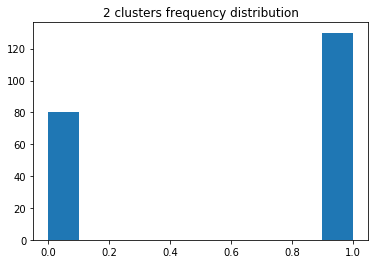

for K = 3
WCSSE: 428.6720009437886
Cluster Centers:
center #0 [ 4.06660859 10.14191893 35.84098009 11.81592066  7.52397236  3.1823335
 10.39801233]
center #1 [ 4.93382436 10.94691274 37.30542404 12.41332714  8.60366812  1.82917353
 10.40106154]
center #2 [ 6.35645488 12.40730852 37.41990178 13.93860446  9.7892399   2.41585013
 12.29286107]




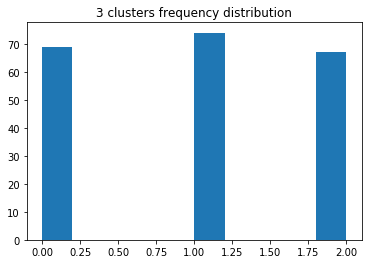

for K = 4
WCSSE: 369.8117475179456
Cluster Centers:
center #0 [ 5.53207197 11.62874933 37.09373569 13.15688073  9.06063663  2.64680895
 11.46169586]
center #1 [ 4.82980425 10.82880104 37.3118555  12.27322934  8.52608703  1.61164063
 10.22594481]
center #2 [ 4.07339425 10.14659127 35.86469271 11.82047461  7.52910824  3.25100221
 10.41433218]
center #3 [ 6.5492244  12.58364844 37.51231498 14.12952054  9.9571537   2.31410422
 12.45009803]




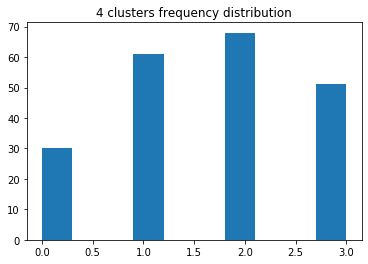

for K = 5
WCSSE: 326.39981829652976
Cluster Centers:
center #0 [ 5.57044936 11.67188495 37.07342203 13.20472941  9.0849054   2.5816746
 11.52463494]
center #1 [ 4.84463809 10.84572392 37.31193781 12.28924416  8.54097822  1.57269792
 10.22907285]
center #2 [ 3.9490985  10.10382039 35.07667557 11.88799844  7.22585642  3.12350856
 10.52485018]
center #3 [ 6.55902799 12.59243471 37.51772698 14.13977977  9.96710624  2.31054456
 12.45782897]
center #4 [ 4.19426402 10.20159127 36.52489268 11.78150004  7.79368053  3.34412905
 10.31896777]




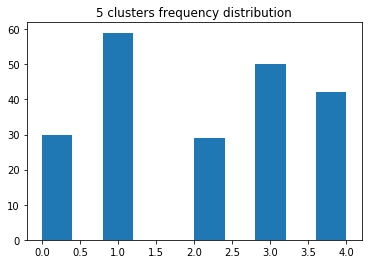

for K = 6
WCSSE: 289.19320955085414
Cluster Centers:
center #0 [ 5.61925984 11.73686184 36.98038828 13.30226998  9.10116863  2.67940462
 11.64935045]
center #1 [ 5.08495196 11.10016982 37.42696184 12.54201569  8.78068327  1.53921163
 10.47054398]
center #2 [ 6.5817938  12.61078649 37.54174718 14.14888494  9.98886209  2.30148384
 12.46692394]
center #3 [ 4.2651599  10.25836401 36.72131854 11.79010893  7.92724073  3.64466361
 10.28816676]
center #4 [ 3.98539989 10.1194058  35.28886379 11.88263854  7.29540261  3.06177059
 10.52095071]
center #5 [ 4.32628253 10.29581473 36.99568123 11.77586239  8.00063272  1.7224889
  9.86472137]




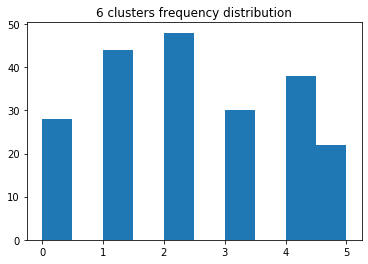

for K = 7
WCSSE: 280.7034706728323
Cluster Centers:
center #0 [ 5.56011927 11.66826757 37.02690394 13.20617182  9.06194516  2.60290469
 11.53727328]
center #1 [ 4.85581616 10.85488706 37.33846766 12.29266529  8.55618086  1.58076664
 10.22378937]
center #2 [ 4.19783718 10.19195899 36.62066716 11.75264252  7.83065101  3.46392947
 10.27699869]
center #3 [ 6.85878403 12.85492386 37.64290992 14.33474055 10.26939809  3.5960678
 12.58747806]
center #4 [ 3.99325324 10.13559341 35.24161868 11.90474011  7.29556131  2.98440055
 10.53280176]
center #5 [ 6.52363539 12.64344565 37.01049328 14.35675668  9.76784075  2.04635684
 12.67043705]
center #6 [ 6.40597908 12.35228849 38.08678127 13.73451766 10.02734668  1.92172114
 12.07500926]




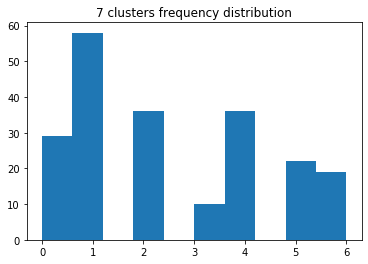

In [17]:
#will store the wcsse for each k
elbow_table = pd.DataFrame(columns=['k value', 'wcsse']) 

#initiating the result table
index = 0  #index for the result_table
result_table = pd.DataFrame()
result_table['features'] = scaled_data.select('features').collect()

#test up to a desired number of clusters
k_count = int(input('How many clusters do you want to try?: '))

#attach a for loop here
for k in range(2,k_count):
    #start a Kmeans model object
    kmeans = KMeans(featuresCol='features_scaled').setK(k)

    #train the model
    model = kmeans.fit(scaled_data)

    #apply the model to the dataset
    results = model.transform(scaled_data)

    print('for K =', k)

    #print the Within cluster sum of squared error
    wcsse = model.computeCost(scaled_data)
    print('WCSSE:', wcsse)

    #print the cluster centers
    centers = model.clusterCenters()
    
    print('Cluster Centers:')
    for i in range(len(centers)):
        print ('center #{}'.format(i),centers[i])
    print('\n')
    
        
    #add the predictions to the results table for each k value
    col_name = '{} clusters'.format(k)
    result_table[col_name] = pd.DataFrame(results.select('prediction').take(220))[0]
    
    #add the wcsse and k to the elboW_table
    elbow_table.loc[index] = [k, wcsse]
    index+=1

    
    #plot the the cluster distribution for each k
    plt.hist(result_table[col_name] )
    plt.title(col_name + ' frequency distribution')
    plt.show()
    
    

In [18]:
result_table

,features,2 clusters,3 clusters,4 clusters,5 clusters,6 clusters,7 clusters
0,"([15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5....",1,1,1,1,1,1
1,"([14.88, 14.57, 0.8811, 5.553999999999999, 3.3...",1,1,1,1,1,1
2,"([14.29, 14.09, 0.905, 5.291, 3.33699999999999...",1,1,1,1,1,1
3,"([13.84, 13.94, 0.8955, 5.324, 3.3789999999999...",1,1,1,1,1,1
4,"([16.14, 14.99, 0.9034, 5.6579999999999995, 3....",0,1,1,1,1,1
...,...,...,...,...,...,...,...
205,"([12.19, 13.2, 0.8783, 5.1370000000000005, 2.9...",1,0,1,4,5,2
206,"([11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5....",1,0,2,4,4,4
207,"([13.2, 13.66, 0.8883, 5.236000000000001, 3.23...",1,0,2,4,3,2
208,"([11.84, 13.21, 0.8521, 5.175, 2.8360000000000...",1,0,2,4,4,4


In [19]:
#print the elbow table
elbow_table

,k value,wcsse
0,2.0,656.793225
1,3.0,428.672001
2,4.0,369.811748
3,5.0,326.399818
4,6.0,289.193210
5,7.0,280.703471


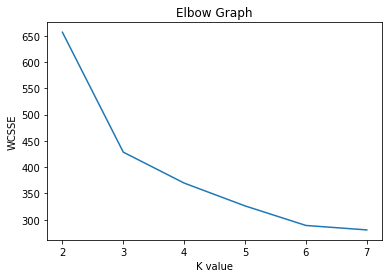

In [20]:
#visualize the elbow table
plt.plot(elbow_table['k value'], elbow_table['wcsse'])
plt.xlabel('K value')
plt.ylabel('WCSSE')
plt.title('Elbow Graph')
plt.show()

## Looking at the data, elbow graph, and frequency distributions, we can group the seeds into 4 clusters.